(2, 400)
(1, 400)
在训练0次后，成本是: 0.693048
在训练1000次后，成本是: 0.288083
在训练2000次后，成本是: 0.254385
在训练3000次后，成本是: 0.233864
在训练4000次后，成本是: 0.226792
在训练5000次后，成本是: 0.222644
在训练6000次后，成本是: 0.219731
在训练7000次后，成本是: 0.217504
在训练8000次后，成本是: 0.219528
在训练9000次后，成本是: 0.218627
{'W1': array([[  0.14736317,  -9.684202  ],
       [-11.13341475,   3.33835637],
       [-11.4660792 , -13.4187904 ],
       [  9.25235566, -10.20073596]]), 'W2': array([[-11.98471399,   3.44431526,   6.15399537,  10.52173021]]), 'b1': array([[-0.09920263],
       [-0.390638  ],
       [-0.03590077],
       [ 0.091875  ]]), 'b2': array([[-0.0527309]])}
预测准确率是: 90%
{'W1': array([[  0.14736317,  -9.684202  ],
       [-11.13341475,   3.33835637],
       [-11.4660792 , -13.4187904 ],
       [  9.25235566, -10.20073596]]), 'W2': array([[-11.98471399,   3.44431526,   6.15399537,  10.52173021]]), 'b1': array([[-0.09920263],
       [-0.390638  ],
       [-0.03590077],
       [ 0.091875  ]]), 'b2': array([[-0.0527309]])}


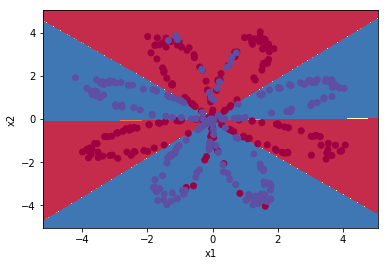

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets 
from testCases import * 


%matplotlib inline 

np.random.seed(1)
X, Y = load_planar_dataset()

# 下面用scatter来将数据集中的400个点画出来。
# X[0, :]表示400点的横坐标，X[1, :]表示纵坐标，c=Y.ravel()是指定400个点的颜色，s=40指定点的大小，
# cmap指定调色板，如果用不同的调色板，那么Y的值对应的颜色也会不同。用plt.cm.Spectral这个调色板时，Y等于0指代红色，1指代蓝色。
# 你可能会有疑问，为什么不直接用c=Y,而用c=Y.ravel()，它们只是维度表示方式不同，
# Y的维度是(1,400),Y.ravel()的维度是(400,)，scatter这个库函数需要后面的形式。
plt.scatter(X[0, :], X[1, :],c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

#加载数据

X ,Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

def init_parameter(n_x,n_h,n_y):
    #n_x输入层神经元的个数即多少个输入
    #n_h 隐藏层神经元的个数
    #n_y 输出层神经元的个数 即多少个输出
    
    np.random.seed(2)
    
    #随机数初始化第一层 隐藏层的 w 
    # 每一个隐藏层神经元都与输入层的每一个神经元相连。每一个相连都会有一个对应的参数w。
    # 所以W1的维度是（n_h, n_x）,表示（隐藏层的神经元个数，输入层神经元个数）
    W1 = np.random.randn(n_h , n_x) * 0.01
    
    b1 = np.zeros(shape=(n_h,1))
    
    W2 = np.random.randn(n_y,n_h)*0.01
    
    b2 = np.zeros(shape=(n_y,1))
    
    parameters = {"W1":W1,"W2":W2,"b1":b1,"b2":b2}
#     print(parameters)

    return parameters

def program(parameters,X,Y):
    
    #样本个数
    
    m = X.shape[1]
#     print(parameters)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
#     print(parameters)
    #前向传播
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    #成本函数
    
    cost = -np.sum( Y*np.log(A2) + (1-Y)*np.log(1-A2)) / m 
    #或者
    # cost = -np.sum(np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y)) / m      
    #f反向传播
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2 ,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    
    dZ1 = np.dot(W2.T, dZ2)* (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    
    grads = {
        "dw1":dW1,
        "dw2":dW2,
        "db1":db1,
        "db2":db2
    }
    
    return grads,cost

def tdown(parameters,t_number=10000,learning_rate=1.2,print_cost=False):
    
    costs = []
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    for i in range(0,t_number):
        grads,cost = program(parameters,X,Y)
#         print(grads['dw1'])
        W1 = W1 - learning_rate * grads['dw1']
        b1 = b1 - learning_rate * grads['db1']
        W2 = W2 - learning_rate * grads['dw2']
        b2 = b2 - learning_rate * grads['db2']
        if print_cost and i % 1000 == 0:
            costs.append(cost)
            print ("在训练%i次后，成本是: %f" % (i, cost))
            
        parameters = {
            'W1':W1,
            'W2':W2,
            'b1':b1,
            'b2':b2
        }
#     print(parameters)
    return parameters

def model(X,Y,n_h,t_number=10000,learning_rate=1.2,print_cost=False):
    
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = init_parameter(n_x,4,n_y)
    chars= tdown(parameters,t_number,learning_rate,print_cost)

    return chars
# 我们已经可以通过上面的函数来进行参数训练。
# 这个函数可以利用上面学习到的参数来对新数据进行预测
def predict(parameters, X):
    """    
    参数:
    parameters -- 训练得出的参数（学习到的参数）
    X -- 预测数据
    """
    print(parameters)
    # 预测其实就是简单地执行一次前向传播
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    #前向传播
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    predictions = np.round(A2) # 对结果进行四舍五入，小于0.5就是0，否则就是1
    
    return predictions
    
# 好，所有函数都实现完毕了，我们已经构建好了一个浅层神经网络了。
# 现在用这个浅层神经网络来执行与文章开头的单神经元网络同样的任务——将花形图案中的红蓝点区分开

# 首先是根据训练数据来进行参数学习（训练数据是与单神经元网络一样一样的）
chars = model(X, Y, n_h = 4, t_number=10000,print_cost=True)

# 然后用训练得出的参数进行预测。
predictions = predict(chars, X)
print ('预测准确率是: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

# 将预测结果画出来。
plot_decision_boundary(lambda x: predict(chars, x.T), X, Y.ravel())